In [1]:
# Logistic regression

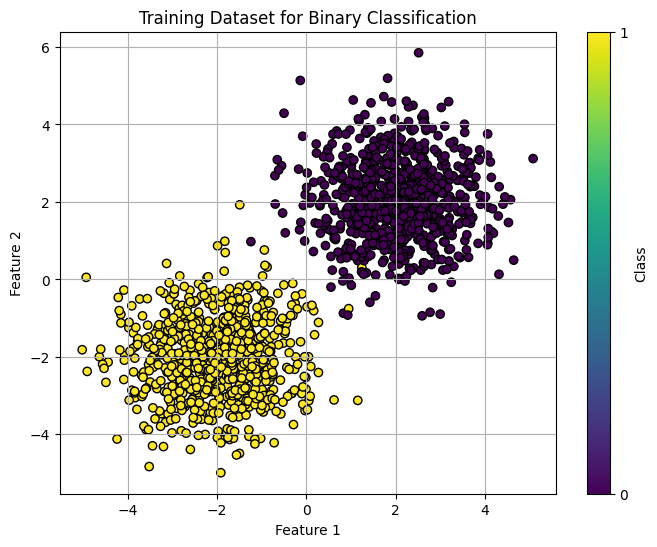

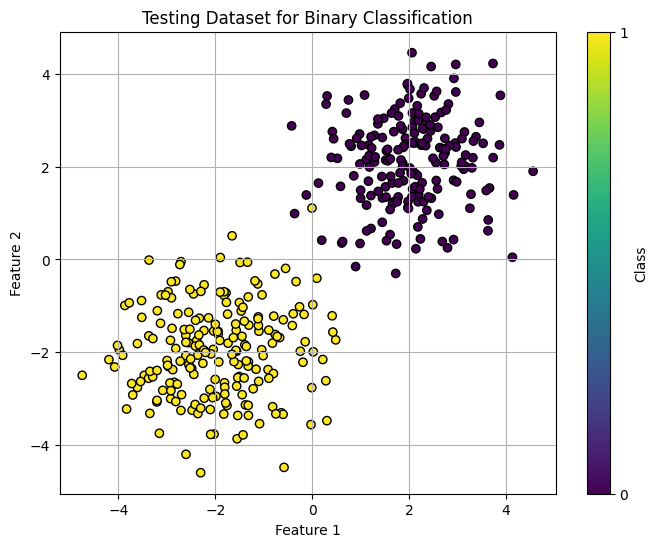

Shape of X_train: (1600, 2)
Shape of y_train: (1600,)
Shape of X_test: (400, 2)
Shape of y_test: (400,)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate synthetic features (assuming 2 features for simplicity)
X1 = np.random.randn(num_samples, 2) + np.array([2, 2])
X2 = np.random.randn(num_samples, 2) + np.array([-2, -2])

# Concatenate the two sets of features
X = np.vstack([X1, X2])

# Generate labels (0s and 1s)
y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# Shuffle the data (optional)
shuffle_idx = np.random.permutation(len(y))
X = X[shuffle_idx]
y = y[shuffle_idx]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the training dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.title('Training Dataset for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Class')
plt.grid(True)
plt.show()

# Plot the testing dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k')
plt.title('Testing Dataset for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Class')
plt.grid(True)
plt.show()

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


In [3]:
# workflow of logistic regression
# 1. comppute logits : Calculating the log-odds of the target variable
    #  formula :- logit(p)=ln(p/1-p) = B0 + B1x1 + B2x2 + B3x3...BnXn

# 2. compute sigmoid: Calculating the probability of the target variable
# 3. compute loss: Calculating the loss of the model
# 4. compute gradient: Calculating the gradient of the loss
# 5. update weights: Updating the weights of the model



In [4]:
# # making logistic regression class from scratch
# import numpy as np

# class LogisticRegression:
#   def __init__(self, learning_rate=0.001, n_iters=1000):
#     self.lr = learning_rate
#     self.n_iters = n_iters
#     self.weights = None
#     self.bias = None


#   # computing logits
#   def logits(self, X):
#     return np.dot(X, self.weights) + self.bias

#   # computing sigmoid
#   def sigmoid(self, logits):
#     return 1.0 / (1.0 + np.exp(-logits))

#   # computing loss
#   def loss(self, X, targets):
#     logits = self.logits(X)
#     # exp = np.exp(logits)
#     # prob = exp / np.sum(exp, axis=1, keepdims=True)
#     # return np.mean(-np.log(prob[range(len(targets)), targets]))
#     # Reshape logits to 2D if it's 1D
#     if logits.ndim == 1:
#         logits = logits.reshape(-1, 1)
#     exp = np.exp(logits)
#     prob = exp / np.sum(exp, axis=1, keepdims=True)
#     return np.mean(-np.log(prob[range(len(targets)), targets]))


#   # computing gradient
#   def gradient(self, X, targets):
#     logits = self.logits(X)
#     # Reshape logits to 2D if it's 1D
#     if logits.ndim == 1:
#         logits = logits.reshape(-1, 1)
#     exp = np.exp(logits)
#     prob = exp / np.sum(exp, axis=1, keepdims=True)
#     # Convert targets to integers and ensure they are within bounds
#     targets_int = targets.astype(int)
#     # Correct the indexing to avoid going out of bounds
#     valid_indices = targets_int < prob.shape[1]
#     prob[np.arange(len(targets))[valid_indices], targets_int[valid_indices]] -= 1
#     return np.dot(X.T, prob)



#   # updating weights
#   def update(self, X, targets):
#     logits = self.logits(X)
#     gradient = self.gradient(X, targets)
#     self.weights -= self.lr * gradient
#     self.bias -= self.lr * np.mean(targets - logits)

#   # training
#   def fit(self, X, targets):
#     self.weights = np.zeros(X.shape[1])
#     self.bias = 0
#     for i in range(self.n_iters):
#       self.update(X, targets)
#       if i % 100 == 0:
#         print(f"Loss at iteration {i}: {self.loss(X, targets)}")

#   # prediction
#   def predict(self, X):
#     logits = self.logits(X)
#     return np.argmax(logits, axis=1)

#   # accuracy
#   def score(self, X, targets):
#     return np.mean(self.predict(X) == targets)




In [5]:
import numpy as np

class LogisticRegression1:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def logits(self, X):
        return np.dot(X, self.weights) + self.bias

    def sigmoid(self, logits):
        return 1.0 / (1.0 + np.exp(-logits))

    def loss(self, X, targets):
        logits = self.logits(X)
        sigmoid_probs = self.sigmoid(logits)
        loss = -np.mean(targets * np.log(sigmoid_probs) + (1 - targets) * np.log(1 - sigmoid_probs))
        return loss

    def gradient(self, X, targets):
        logits = self.logits(X)
        sigmoid_probs = self.sigmoid(logits)
        gradient_weights = np.dot(X.T, sigmoid_probs - targets) / len(targets)
        gradient_bias = np.mean(sigmoid_probs - targets)
        return gradient_weights, gradient_bias

    def update(self, X, targets):
        gradient_weights, gradient_bias = self.gradient(X, targets)
        self.weights -= self.lr * gradient_weights
        self.bias -= self.lr * gradient_bias

    def fit(self, X, targets):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iters):
            self.update(X, targets)
            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {self.loss(X, targets)}")

    def predict(self, X):
        logits = self.logits(X)
        return np.round(self.sigmoid(logits))

    def score(self, X, targets):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == targets)
        return accuracy


In [6]:
LR = LogisticRegression1()
LR.fit(X_train, y_train)

Iteration 0, Loss: 0.6728433622448244
Iteration 100, Loss: 0.16200566692804197
Iteration 200, Loss: 0.09910764379146436
Iteration 300, Loss: 0.07455365226922292
Iteration 400, Loss: 0.06123884301457791
Iteration 500, Loss: 0.05278611374077638
Iteration 600, Loss: 0.04689663237255491
Iteration 700, Loss: 0.04253270667705492
Iteration 800, Loss: 0.03915469545861135
Iteration 900, Loss: 0.03645306148896072


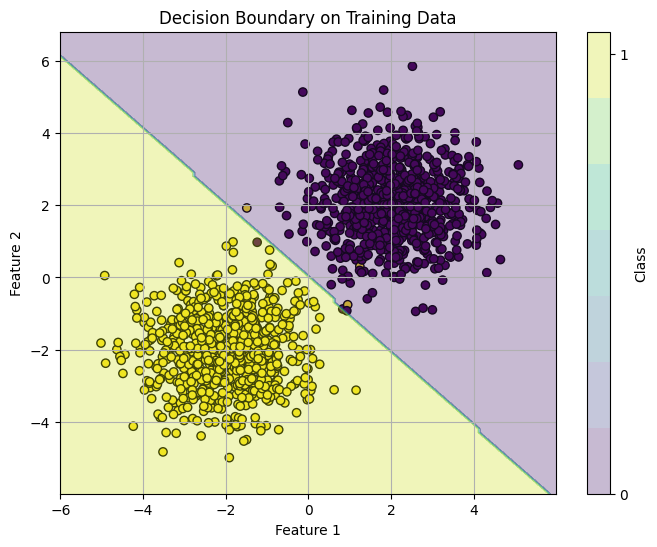

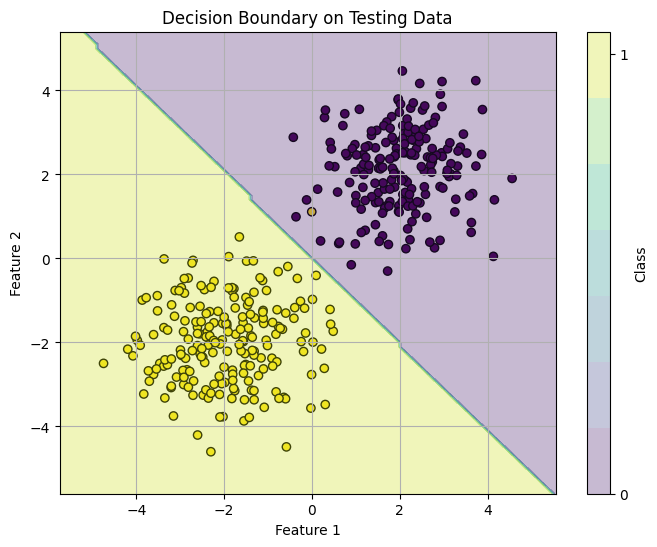

Accuracy on test set: 0.9975


In [7]:
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='viridis')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(ticks=[0, 1], label='Class')
    plt.grid(True)
    plt.show()

# Plotting decision boundary on training data
plot_decision_boundary(X_train, y_train, LR, 'Decision Boundary on Training Data')

# Plotting decision boundary on testing data
plot_decision_boundary(X_test, y_test, LR, 'Decision Boundary on Testing Data')

# Evaluating model performance on test data
accuracy = LR.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")

In [8]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from matplotlib.animation import FuncAnimation

# # Logistic Regression class definition
# class LogisticRegression:
#     def __init__(self, learning_rate=0.1, n_iters=1000):
#         self.lr = learning_rate
#         self.n_iters = n_iters
#         self.weights = None
#         self.bias = None

#     def logits(self, X):
#         return np.dot(X, self.weights) + self.bias

#     def sigmoid(self, logits):
#         return 1.0 / (1.0 + np.exp(-logits))

#     def loss(self, X, targets):
#         logits = self.logits(X)
#         sigmoid_probs = self.sigmoid(logits)
#         loss = -np.mean(targets * np.log(sigmoid_probs) + (1 - targets) * np.log(1 - sigmoid_probs))
#         return loss

#     def gradient(self, X, targets):
#         logits = self.logits(X)
#         sigmoid_probs = self.sigmoid(logits)
#         gradient_weights = np.dot(X.T, sigmoid_probs - targets) / len(targets)
#         gradient_bias = np.mean(sigmoid_probs - targets)
#         return gradient_weights, gradient_bias

#     def update(self, X, targets):
#         gradient_weights, gradient_bias = self.gradient(X, targets)
#         self.weights -= self.lr * gradient_weights
#         self.bias -= self.lr * gradient_bias

#     def fit(self, X, targets):
#         # Initialize weights and bias
#         self.weights = np.zeros(X.shape[1])
#         self.bias = 0

#         # Initialize figure and axes for animation
#         fig, ax = plt.subplots(figsize=(8, 6))

#         # Scatter plot of data points
#         ax.scatter(X[:, 0], X[:, 1], c=targets, cmap='viridis', edgecolors='k', label='Data points')

#         # Set labels and title
#         ax.set_xlabel('Feature 1')
#         ax.set_ylabel('Feature 2')
#         ax.set_title('Logistic Regression Fit Animation')

#         # Initialize line object for decision boundary
#         line, = ax.plot([], [], color='red', label='Decision Boundary')

#         # Initialization function: plot the background of each frame
#         def init():
#             line.set_data([], [])
#             return line,

#         # Animation function: update the plot with new data for each frame
#         def animate(i):
#             # Update model for this iteration
#             self.update(X, targets)

#             # Compute decision boundary line points
#             x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#             x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#             xx1 = np.array([x1_min, x1_max])
#             xx2 = -(self.weights[0] * xx1 + self.bias) / self.weights[1]  # Decision boundary equation

#             # Update line data
#             line.set_data(xx1, xx2)
#             return line,

#         # Set up animation
#         anim = FuncAnimation(fig, animate, init_func=init, frames=self.n_iters, interval=100, blit=True)

#         # Show legend and display plot
#         ax.legend(loc='upper right')
#         plt.tight_layout()
#         plt.show()

#         return anim

#     def predict(self, X):
#         logits = self.logits(X)
#         return np.round(self.sigmoid(logits))

#     def score(self, X, targets):
#         predictions = self.predict(X)
#         accuracy = np.mean(predictions == targets)
#         return accuracy

# # Generating synthetic dataset
# np.random.seed(42)
# num_samples = 1000
# X1 = np.random.randn(num_samples, 2) + np.array([2, 2])
# X2 = np.random.randn(num_samples, 2) + np.array([-2, -2])
# X = np.vstack([X1, X2])
# y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])
# shuffle_idx = np.random.permutation(len(y))
# X = X[shuffle_idx]
# y = y[shuffle_idx]

# # Splitting dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create instance of LogisticRegression model
# LR = LogisticRegression(learning_rate=0.1, n_iters=50)  # Limiting n_iters for demonstration

# # Train the model and animate the decision boundary fitting the data
# animation = LR.fit(X_train, y_train)

# # Save the animation as GIF (optional)
# # animation.save('logistic_regression_fit_animation.gif', writer='imagemagick')

# # Evaluating model performance on test data
# accuracy = LR.score(X_test, y_test)
# print(f"Accuracy on test set: {accuracy}")


In [9]:
# import numpy as np
# import plotly.graph_objects as go
# from sklearn.model_selection import train_test_split

# # Logistic Regression class definition
# class LogisticRegression:
#     def __init__(self, learning_rate=0.1, n_iters=1000):
#         self.lr = learning_rate
#         self.n_iters = n_iters
#         self.weights = None
#         self.bias = None

#     def logits(self, X):
#         return np.dot(X, self.weights) + self.bias

#     def sigmoid(self, logits):
#         return 1.0 / (1.0 + np.exp(-logits))

#     def loss(self, X, targets):
#         logits = self.logits(X)
#         sigmoid_probs = self.sigmoid(logits)
#         loss = -np.mean(targets * np.log(sigmoid_probs) + (1 - targets) * np.log(1 - sigmoid_probs))
#         return loss

#     def gradient(self, X, targets):
#         logits = self.logits(X)
#         sigmoid_probs = self.sigmoid(logits)
#         gradient_weights = np.dot(X.T, sigmoid_probs - targets) / len(targets)
#         gradient_bias = np.mean(sigmoid_probs - targets)
#         return gradient_weights, gradient_bias

#     def update(self, X, targets):
#         gradient_weights, gradient_bias = self.gradient(X, targets)
#         self.weights -= self.lr * gradient_weights
#         self.bias -= self.lr * gradient_bias

#     def fit(self, X, targets):
#         # Initialize weights and bias
#         self.weights = np.zeros(X.shape[1])
#         self.bias = 0

#         # Initialize figure and axes for animation
#         fig = go.Figure()

#         # Scatter plot of data points
#         fig.add_trace(go.Scatter3d(
#             x=X[:, 0], y=X[:, 1], z=targets,
#             mode='markers', marker=dict(color=targets, size=5, opacity=0.8),
#             name='Data points'
#         ))

#         # Set labels and title
#         fig.update_layout(
#             scene=dict(
#                 xaxis_title='Feature 1',
#                 yaxis_title='Feature 2',
#                 zaxis_title='Class'
#             ),
#             # Set the title at the top level of the layout
#             title='Logistic Regression Fit Animation'
#         )

#         # Initialize line object for decision boundary
#         decision_boundary = fig.add_trace(go.Scatter3d(
#             x=[], y=[], z=[],
#             mode='lines', line=dict(color='red', width=4),
#             name='Decision Boundary'
#         ))

#         # Animation function: update the plot with new data for each frame
#         def animate(epoch):
#             # Train the model for one epoch
#             for _ in range(epoch + 1):
#                 self.update(X, targets)

#             # Compute decision boundary line points
#             x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#             x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#             xx1 = np.array([x1_min, x1_max])
#             xx2 = -(self.weights[0] * xx1 + self.bias) / self.weights[1]  # Decision boundary equation

#             # Update decision boundary data
#             decision_boundary.x = xx1.tolist()
#             decision_boundary.y = xx2.tolist()
#             decision_boundary.z = [0, 0]  # Fixed z-coordinates for 3D plot

#             return fig

#         # Create frames for animation
#         frames = []
#         for i in range(self.n_iters):
#             # Capture the figure state at each iteration
#             frames.append(go.Frame(data=fig.data, layout=fig.layout))

#         # Add frames to the figure
#         fig.frames = frames

#         # Return the figure object
#         return fig  # <-- Add this line to return the figure

# LR = LogisticRegression(learning_rate=0.1, n_iters=50)  # Limiting n_iters for demonstration

# # Train the model and animate the decision boundary fitting the data
# animation = LR.fit(X, y)

# # Display the animation
# animation.show()


In [10]:
# applying logstic regression on real data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
df = pd.read_csv('/content/mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [11]:
# standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = sc.fit_transform(X)

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# fit the model
LR2 = LogisticRegression1()
LR.fit(X_train, y_train)

Iteration 0, Loss: 0.6927751065556107
Iteration 100, Loss: 0.6672279611959417
Iteration 200, Loss: 0.6548649408017605
Iteration 300, Loss: 0.6481977291007411
Iteration 400, Loss: 0.6442833610560038
Iteration 500, Loss: 0.641844027819407
Iteration 600, Loss: 0.6402611218518305
Iteration 700, Loss: 0.6392050906741646
Iteration 800, Loss: 0.638486588276644
Iteration 900, Loss: 0.637990549629713


In [14]:
accuracy = LR.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.6449774224591014


In [20]:
# using logistic regression with scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
LRO = LogisticRegression()
LRO.fit(X_train, y_train)
# evaluate the model
y_pred = LRO.predict(X_test)
y_pred

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))


Accuracy: 0.6409060626249167
Precision of logistic regression classifier on test set: 0.66


In [16]:
y_test.head()

35550    1
43142    1
19276    0
7793     1
32044    1
Name: class, dtype: int64

In [17]:

# make predictions on the test set

y_pred = LR.predict(X_test)  # Use X_test instead of df1

# make new dataframe with predicted values and actual values
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head(29)

,Actual,Predicted
35550,1,1.0
43142,1,1.0
19276,0,0.0
7793,1,1.0
32044,1,0.0
43676,0,0.0
27639,1,1.0
26024,1,0.0
8694,1,1.0
681,1,1.0


In [26]:
# plan for Hyperparameter tuning

# 1. scaling
# 2. feature selection
# 3. model training
# 4. model evaluation
# 5. hyperparameter tuning

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif # Change scoring function

# step 1 -> scaling

trf1 = ColumnTransformer([
    ('scale', StandardScaler(), [0,7])
], remainder='passthrough')


# step 2 -> feature selection

# Use f_classif for data with negative values
trf2 = ColumnTransformer([
    ('select', SelectKBest(score_func=f_classif, k='all'), [0,7])
], remainder='passthrough')


# step 3 -> model training

ftr3 = LogisticRegression()

pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('ftr3', ftr3)
])


# step 4 -> model evaluation

pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  [0, 7])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('select',
                                                  SelectKBest(k='all'),
                                                  [0, 7])])),
                ('ftr3', LogisticRegression())])

In [31]:
# Using GridSearch Cv

from sklearn.model_selection import GridSearchCV

param = {
    'trf2__select__k': ['all'],
    'ftr3__C': [0.01, 0.1, 1]  # Values for the inverse of regularization strength in logistic regression

    # C is the inverse of regularization strength
    #  high value of C tells the model to give high weight to the training data,
    # and a lower weight to the complexity penalty.  (complexity penalty is the penalty on the complexity of the model)
    # A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data. Basically,
    # a high C means "Trust this training data a lot", while a low value says "This data may not be fully representative of the real world data,
    # so if it's telling you to make a parameter really large, don't listen to it".

    # Think of it like this:

    # High C: The model is a student who memorizes the entire textbook,
    # including all the typos and irrelevant details.
    # They might ace the training data (the textbook),
    # but struggle with new questions (unseen data).

    # Medium C: The model is a student who focuses on the core concepts and principles.
    # They might not get every single training question right,
    # but they're better equipped to handle new challenges.

    # Low C: The student focuses on understanding the core concepts and principles.
    # They might not get every single training question right,
    # but they're better equipped to handle new challenges.
}
grid = GridSearchCV(pipe, param, cv=5, verbose=2)
grid.fit(X_train, y_train) # Fit the GridSearchCV object to the data

print(grid.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..................ftr3__C=0.01, trf2__select__k=all; total time=   0.1s
[CV] END ..................ftr3__C=0.01, trf2__select__k=all; total time=   0.1s
[CV] END ..................ftr3__C=0.01, trf2__select__k=all; total time=   0.1s
[CV] END ..................ftr3__C=0.01, trf2__select__k=all; total time=   0.1s
[CV] END ..................ftr3__C=0.01, trf2__select__k=all; total time=   0.1s
[CV] END ...................ftr3__C=0.1, trf2__select__k=all; total time=   0.1s
[CV] END ...................ftr3__C=0.1, trf2__select__k=all; total time=   0.1s
[CV] END ...................ftr3__C=0.1, trf2__select__k=all; total time=   0.1s
[CV] END ...................ftr3__C=0.1, trf2__select__k=all; total time=   0.1s
[CV] END ...................ftr3__C=0.1, trf2__select__k=all; total time=   0.1s
[CV] END .....................ftr3__C=1, trf2__select__k=all; total time=   0.2s
[CV] END .....................ftr3__C=1, trf2__se

In [34]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Assuming you have X_train, y_train, and X_test ready

# Create and fit the model with cross-validation
model = LogisticRegressionCV(cv=5, Cs=10, penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# best parameters
print('Best parameters:', model.C_)

Accuracy: 0.6425346065585905
Best parameters: [0.00077426]
